# value iteration & policy iteration in frozen lake env 

https://aleksandarhaber.com/installation-and-getting-started-with-openai-gym-and-frozen-lake-environment-reinforcement-learning-tutorial/

https://colab.research.google.com/github/DavidBert/N7-techno-IA/blob/master/code/reinforcement_learning/frozen_lake_solution.ipynb#scrollTo=xRjtFPVj5lqy

https://towardsdatascience.com/q-learning-for-beginners-2837b777741

https://www.youtube.com/watch?v=gbhXXKJdc7c&list=PL58zEckBH8fCt_lYkmayZoR9XfDCW9hte&index=13


-----


SFFF       (S: starting point, safe)     

<br>
</br>


FHFH       (F: frozen surface, saf)   


<br>
</br>

)
FFFH       (H: hole, fall to your doo    


<br>
</br>

m)
HFFG       (G: goal, where the frisbee is lot

    


<br>
</br>


ed)

In [1]:
import gym
import numpy as np

env = gym.make("FrozenLake8x8-v1", render_mode="human")
env.reset()
env.render()

In [2]:
print(f"Action Space {env.action_space.n}") # 설정된 행동 
print(f"State Space {env.observation_space.n}") # 8*8 grid 

Action Space 4
State Space 64


In [12]:
for i in range(env.action_space.n):
    print(i)

0
1
2
3


In [3]:
action_map = {0:u'\u2190', 1:u'\u2193', 2:u'\u2192', 3:u'\u2191'} # action  space 
for k, v in action_map.items():
    print(f"action {k}: {v}")

action 0: ←
action 1: ↓
action 2: →
action 3: ↑


In [4]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

random_action = env.action_space.sample()
return_val = env.step(random_action)

# action space에서 random sample한것을 step을 통해 진행 했을때의 결과 볼수있고 그 결과의 format 다음과 같다 
# format of returnValue is (observation,reward, terminated, truncated, info)
# observation (object)  - observed state
# reward (float)        - reward that is the result of taking the action
# terminated (bool)     - is it a terminal state
# truncated (bool)      - it is not important in our case
# info (dictionary)     - in our case transition probability

print(random_action)
print(return_val)

env.render()

C:\Users\maeng\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


1
(8, 0.0, False, False, {'prob': 0.3333333333333333})


In [5]:
# transition prob 확인하는 방법 

#p(s'|s,a) probability of going to state s' 
#          starting from the state s and by applying the action a
 
# env.P[state][action]
env.P[0][1] #state 0, action 1
# output is a list having the following entries
# (transition probability, next state, reward, Is terminal state?)
# state 0 action 1을 했을때 연결되는 state 리스트가 위에 포맷에 맞게 나온다 

print(env.P[0][1])
print('---')
for i,j,k,p in env.P[0][2]:
    print(i,j,k,p)

[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 8, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
---
0.3333333333333333 8 0.0 False
0.3333333333333333 1 0.0 False
0.3333333333333333 0 0.0 False


In [6]:
def compute_sum(env, V, s, a, gamma):
    # V is a list containing the estimated value for every state
    # len(V) = nb_states
    total = 0  # state value for state s
    for p, s_prime, r, _ in env.env.P[s][a]:
        total += p * (r + gamma * V[s_prime])
    return total


## Value iteration 

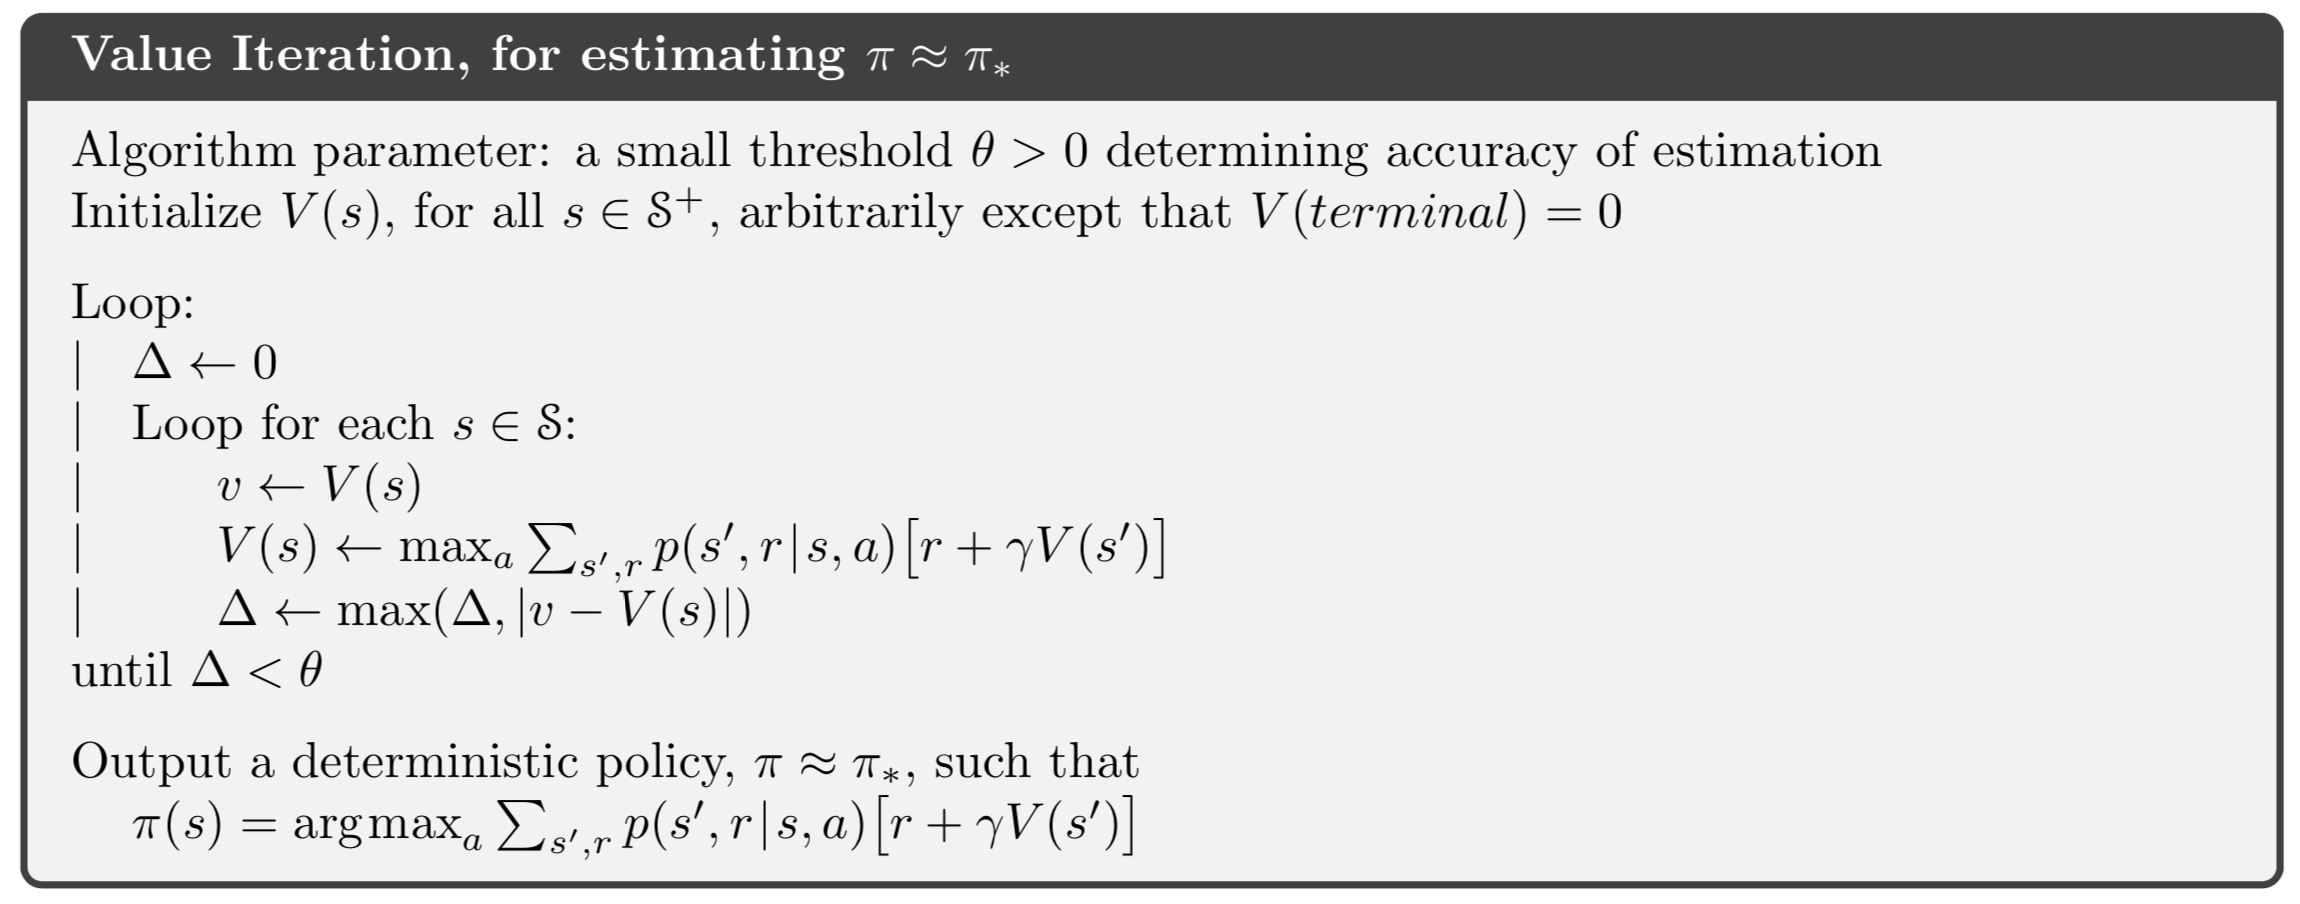

In [7]:

def value_iteration(env, gamma, theta):
    nb_states = env.observation_space.n
    nb_actions = env.action_space.n
    V = np.zeros(nb_states)
    
    while True:
        delta = 0
        # 모든 state에 대해서 모든 action space를 본다 -> 이미 optimal 나와도 끝까지 계산하기 때문에 복잡도 높다 
        # 모든 satte에서 취할수있는 모든 action 가능성을 계산한다 
        for s in range(nb_states):
            v = V[s]
            V[s] = max([compute_sum(env, V=V, s=s, a=a, gamma=gamma) for a in range(nb_actions)])            
            delta = max(delta, abs(v - V[s]))
    
        if delta < theta: break

    # Output a deterministic policy
    
    pi = np.zeros(nb_states)
    for s in range(nb_states):
        pi[s] = np.argmax([compute_sum(env, V=V, s=s, a=a, gamma=gamma) for a in range(nb_actions)])
    
    return V, pi

In [8]:
V, pi = value_iteration(env, gamma=1.0, theta=1e-8)

In [9]:
V

array([0.99999989, 0.9999999 , 0.99999991, 0.99999991, 0.99999992,
       0.99999993, 0.99999993, 0.99999994, 0.9999999 , 0.9999999 ,
       0.99999991, 0.99999991, 0.99999992, 0.99999993, 0.99999993,
       0.99999994, 0.9999998 , 0.97820145, 0.92643036, 0.        ,
       0.8566176 , 0.94623156, 0.98207715, 0.99999995, 0.99999971,
       0.93460466, 0.80108974, 0.47490369, 0.62362133, 0.        ,
       0.94467756, 0.99999996, 0.99999964, 0.82561283, 0.54223419,
       0.        , 0.53934271, 0.61118919, 0.85195557, 0.99999997,
       0.99999958, 0.        , 0.        , 0.16804077, 0.38321759,
       0.44226931, 0.        , 0.99999998, 0.99999954, 0.        ,
       0.19467338, 0.12090471, 0.        , 0.33240113, 0.        ,
       0.99999999, 0.99999952, 0.73155746, 0.46311542, 0.        ,
       0.27746704, 0.55493409, 0.77746704, 0.        ])

In [10]:
pi

array([1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 0.,
       0., 0., 0., 2., 3., 3., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0.])

## Policy iteration 


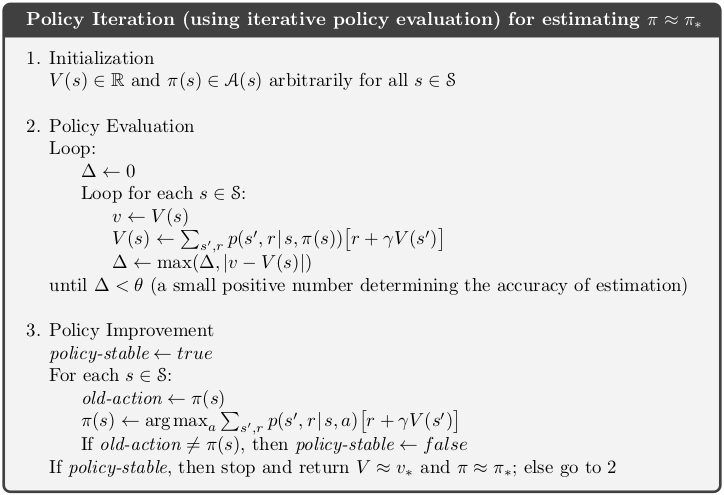


In [11]:

def policy_iteration(env, gamma, theta):
    nb_states = env.observation_space.n
    nb_actions = env.action_space.n
    # 1. Initialization
    V = np.zeros(nb_states)
    pi = np.zeros(nb_states)
    
    while True:
    
        # 2. Policy Evaluation
        while True:
            delta = 0
            for s in range(nb_states):
                v = V[s]
                V[s] = compute_sum(env, V=V, s=s, a=pi[s], gamma=gamma)
                delta = max(delta, abs(v - V[s]))
            if delta < theta: break

        # 3. Policy Improvement
        # Evaluation에서 계산한 action space에 대해 최대값을 구한다 -> 여기서는 greedy policy를 따른다 
        policy_stable = True
        for s in range(nb_states):
            old_action = pi[s]
            pi[s] = np.argmax([compute_sum(env, V=V, s=s, a=a, gamma=gamma) for a in range(nb_actions)])
            if old_action != pi[s]: policy_stable = False
        if policy_stable: break
    return V, pi

In [12]:
V

array([0.99999989, 0.9999999 , 0.99999991, 0.99999991, 0.99999992,
       0.99999993, 0.99999993, 0.99999994, 0.9999999 , 0.9999999 ,
       0.99999991, 0.99999991, 0.99999992, 0.99999993, 0.99999993,
       0.99999994, 0.9999998 , 0.97820145, 0.92643036, 0.        ,
       0.8566176 , 0.94623156, 0.98207715, 0.99999995, 0.99999971,
       0.93460466, 0.80108974, 0.47490369, 0.62362133, 0.        ,
       0.94467756, 0.99999996, 0.99999964, 0.82561283, 0.54223419,
       0.        , 0.53934271, 0.61118919, 0.85195557, 0.99999997,
       0.99999958, 0.        , 0.        , 0.16804077, 0.38321759,
       0.44226931, 0.        , 0.99999998, 0.99999954, 0.        ,
       0.19467338, 0.12090471, 0.        , 0.33240113, 0.        ,
       0.99999999, 0.99999952, 0.73155746, 0.46311542, 0.        ,
       0.27746704, 0.55493409, 0.77746704, 0.        ])

In [13]:
pi

array([1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 0.,
       0., 0., 0., 2., 3., 3., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0.])

In [25]:
# policy iteration other version 


##################
# this function computes the state value function by using the iterative policy evaluation algorithm
##################
# inputs: 
##################
# env - environment 
# valueFunctionVector - initial state value function vector
# policy - policy to be evaluated - this is a matrix with the dimensions (number of states)x(number of actions)
#        - p,q entry of this matrix is the probability of selection action q in state p
# discountRate - discount rate 
# maxNumberOfIterations - max number of iterations of the iterative policy evaluation algorithm
# convergenceTolerance - convergence tolerance of the iterative policy evaluation algorithm
##################
# outputs:
##################
# valueFunctionVector - final value of the state value function vector 
 
##################
def evaluatePolicy(env,valueFunctionVector,policy,discountRate,maxNumberOfIterations,convergenceTolerance):
    import numpy as np
    convergenceTrack=[]
    for iterations in range(maxNumberOfIterations):
        convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
        valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
        for state in env.P:
            outerSum=0
            for action in env.P[state]:
                innerSum=0
                for probability, nextState, reward, isTerminalState in env.P[state][action]:
                    #print(probability, nextState, reward, isTerminalState)
                    innerSum=innerSum+ probability*(reward+discountRate*valueFunctionVector[nextState])
                outerSum=outerSum+policy[state,action]*innerSum
            valueFunctionVectorNextIteration[state]=outerSum
        if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
            valueFunctionVector=valueFunctionVectorNextIteration
            print('Iterative policy evaluation algorithm converged!')
            break
        valueFunctionVector=valueFunctionVectorNextIteration       
    return valueFunctionVector

In [24]:
##################
# this function computes an improved policy 
##################
# inputs: 
# env - environment 
# valueFunctionVector - state value function vector that is previously computed
# numberActions - number of actions 
# numberStates - number of states 
# discountRate - discount rate
 
# outputs:
# improvedPolicy - improved policy
# qvaluesMatrix  - matrix containing computed action-value functions 
#                - (p,q) entry of this matrix is the action value function computed at the state p and for the action q
# Note: qvaluesMatrix is just used for double check - it is actually not used lated on    
     
     
##################
 
def improvePolicy(env,valueFunctionVector,numberActions,numberStates,discountRate):
    import numpy as np
    # this matrix will store the q-values (action value functions) for every state
    # this matrix is returned by the function 
    qvaluesMatrix=np.zeros((numberStates,numberActions))
    # this is the improved policy
    # this matrix is returned by the function
    improvedPolicy=np.zeros((numberStates,numberActions))
     
    for stateIndex in range(numberStates):
        # computes a row of the qvaluesMatrix[stateIndex,:] for fixed stateIndex, 
        # this loop iterates over the actions
        for actionIndex in range(numberActions):
            # computes the Bellman equation for the action value function
            for probability, nextState, reward, isTerminalState in env.P[stateIndex][actionIndex]:
                qvaluesMatrix[stateIndex,actionIndex]=qvaluesMatrix[stateIndex,actionIndex]+probability*(reward+discountRate*valueFunctionVector[nextState])
             
        # find the action indices that produce the highest values of action value functions
        bestActionIndex=np.where(qvaluesMatrix[stateIndex,:]==np.max(qvaluesMatrix[stateIndex,:]))
 
        # form the improved policy        
        improvedPolicy[stateIndex,bestActionIndex]=1/np.size(bestActionIndex)
    return improvedPolicy,qvaluesMatrix

In [19]:
!pip install matplotlib
!pip install seaborn

In [33]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 
# create the environment 
# this is a completely deterministic environment
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode="human")
# this is a completely stochastic environment - the algorithm will not work properly since the transition probabilities are equal -too much!
#env=gym.make("FrozenLake-v1", render_mode="human") 
env.reset()
# render the environment
# uncomment this if you want to render the environment
env.render()
#
#env.close()
 
# investigate the environment
# observation space - states 
env.observation_space
 
env.action_space
# actions:
#0: LEFT
#1: DOWN
#2: RIGHT
#3: UP
 
##########################################################################
#           general parameters for the policy iteration
##########################################################################
# select the discount rate
discountRate=0.9
# number of states - determined by the Frozen Lake environment
stateNumber=16
# number of possible actions in every state - determined by the Frozen Lake environment
actionNumber=4
# maximal number of iterations of the policy iteration algorithm 
maxNumberOfIterationsOfPolicyIteration=1000
 
# select an initial policy
# initial policy starts with a completely random policy
# that is, in every state, there is an equal probability of choosing a particular action
initialPolicy=(1/actionNumber)*np.ones((stateNumber,actionNumber))
##########################################################################
#           parameters of the iterative policy evaluation algorithm
##########################################################################
# initialize the value function vector
valueFunctionVectorInitial=np.zeros(env.observation_space.n)
# maximum number of iterations of the iterative policy evaluation algorithm
maxNumberOfIterationsOfIterativePolicyEvaluation=1000
# convergence tolerance 
convergenceToleranceIterativePolicyEvaluation=10**(-6)
###########################################################################
###########################################################################
 
for iteration in range(maxNumberOfIterationsOfPolicyIteration):
    print("Iteration - {} - of policy iteration algorithm".format(iteration))
    if (iteration == 0):
        currentPolicy=initialPolicy
    valueFunctionVectorComputed =evaluatePolicy(env,valueFunctionVectorInitial,currentPolicy,discountRate,maxNumberOfIterationsOfIterativePolicyEvaluation,convergenceToleranceIterativePolicyEvaluation)
    improvedPolicy,qvaluesMatrix=improvePolicy(env,valueFunctionVectorComputed,actionNumber,stateNumber,discountRate)
    # if two policies are equal up to a certain "small" tolerance
    # then break the loop - our algorithm converged
    if np.allclose(currentPolicy,improvedPolicy):
        currentPolicy=improvedPolicy
        print("Policy iteration algorithm converged!")
        break
    currentPolicy=improvedPolicy
    



Iteration - 0 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Iteration - 1 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Iteration - 2 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Policy iteration algorithm converged!
